# Testing different art styles and or model parameters

In [1]:
import sys
import os
import IPython.display as ipd
import matplotlib.pyplot as plt
import polars as pl
import math
import textwrap
from PIL import Image
HOME_DIR = r'c:\Users\jordy\Documents\python\projects\GenAI_TCG'
sys.path.append(HOME_DIR)
from lib.artdesign import ArtDesignClient

art = ArtDesignClient()
target_card_size = (816, 1110)

## 1. illustrations

### art styles tests

- [aesthetics wiki](https://aesthetics.fandom.com/wiki/Special:AllPages)

In [ ]:
main_prompt = "A bear wearing dark-green cape with only one golden shiny necklace, loading a bag of fruits into its shed."
art_styles = [
    "\nBackground: ocean and jungle\ncozy cottagecore illustration style, soft pastel colors, whimsical, gentle lighting, detailed foliage, storybook illustration, digital painting, high quality",
    "\nBackground: ocean and jungle\nin a chibi/kawaii anime style, large expressive eyes, bright vibrant colors, simple shading, cute pose, digital illustration, high quality, clean lines",
    "\nBackground: ocean and jungle\nin a soft fantasy style, ethereal lighting, pastel colors, dreamlike atmosphere, delicate details, flowing fabrics, digital painting, high quality, magical",
    "\nBackground: ocean and jungle\nin an isometric view, stylized flat colors, clean lines, vibrant palette, whimsical details, digital illustration, high quality, game art",
    "\nBackground: ocean and jungle\nPixel art, 8-bit style, limited color palette, blocky shapes, nostalgic feel, simple shading, digital art, high quality",
    "\nBackground: ocean and jungle\nJapanese anime style, high quality",
    "\nBackground: ocean and jungle\nin a minimalist style, high quality",
    "\nBackground: ocean and jungle\nin an origami-style, high quality",
    "\nBackground: ocean and jungle\nin a clay animation scene, high quality",
    "\nBackground: ocean and jungle\nin a steampunk style, high quality",
    "\nBackground: ocean and jungle\nin a 3D Cubic style, high quality",
    "\nBackground: ocean and jungle\nin a Surrealism style, high quality",
    "\nBackground: ocean and jungle\nin a Pop Art style, high quality",
    "\nBackground: ocean and jungle\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality",
]

prompts = []
for p in art_styles:
    prompts.append((main_prompt + p, "sand, desert, yellow, mountains, brown")) # neg prompt human skin, human face, hair, furriness, 

images_list = art.run_prompts(prompts, size=(target_card_size[0]/2, target_card_size[1]/2), im_number=1, shift=3.10, steps=30, cfg=5)

# Save images
for i, img in enumerate(images_list):
    output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards_ex", f"illu_art_test_{i:03d}.png")
    img.save(output_filename)

In [ ]:
# Plot images with max 4 columns
n_images = len(images_list)
n_cols = min(4, n_images)
n_rows = math.ceil(n_images / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 7 * n_rows), facecolor='white')
axes = axes.flatten()
for idx, img in enumerate(images_list):
    # Extract title from the 2nd part of art_styles (after the 2nd '\n')
    style_desc = art_styles[idx]
    title = style_desc.split('\n', 2)[-1] if style_desc.count('\n') >= 2 else style_desc
    axes[idx].imshow(img)
    n_chars = 50
    if len(title) > n_chars:
        # Insert a newline every 30 characters, but try to break at spaces if possible
        title = '\n'.join(textwrap.wrap(title, n_chars))
    axes[idx].set_title(title, fontsize=10)
    axes[idx].title.set_color('black')
    axes[idx].axis('off')
    axes[idx].set_facecolor('white')

# Hide any unused axes
for ax in axes[n_images:]:
    ax.axis('off')
    ax.set_facecolor('white')

plt.tight_layout()
plt.show()

### differrent factions tests

In [ ]:
main_prompts = [
    # "A young dark skin female dwarf, wearing brown and blue armor, loading a big bag of fruits and vegetables into its shed",
    # "A reptilian in dark-bleu and dark-green clothes, loading a big bag of fruits and vegetables into its shed",
    # "A winged fae with brown and yellow armor, loading a big bag of fruits and vegetables into its shed",
    # "A bear with dark green cape, loading a big bag of fruits and vegetables into its shed",
    # "A horned tiefling with dark-purple mage's robe, loading a bag of shiny purple shards into its shed",
    # "A orc with a dark-red torn armor, loading a big bag of meat into its shed",
    # "A goblin with dark-red and green clothes, loading a big bag of fruits and vegetables into its shed",
    # "A undead with dark-bleu and dark-green clothes, loading a big bag of fruits and vegetables into its shed",
    # "A treant with dark-orange leaves, Looking at the honey in the beehive",
    "A tabaxi male cat with a dark-orange skintight spacesuit, loading a big bag of fishes into its shed",
    "A mummy, loading a big bag of brains into its shed",
    # "A ghost, loading a big bag of fruits and vegetables into its shed",
]

art_styles = [
    "\nBackground: ocean and mountains\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality",
]

negative_prompts = [
    "sand, desert, jungle, grass",
]

prompts = []
for i, p in enumerate(main_prompts):
    prompts.append((p + art_styles[0], negative_prompts[0]))

images_list = art.run_prompts(prompts, size=(target_card_size[0], target_card_size[1]), im_number=1, shift=3.10, steps=30, cfg=5)

In [ ]:
# Plot images with max 4 columns
n_images = len(images_list)
n_cols = min(4, n_images)
n_rows = math.ceil(n_images / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 7 * n_rows), facecolor='white')
axes = axes.flatten()
for idx, img in enumerate(images_list):
    # Extract title from the 2nd part of art_styles (after the 2nd '\n')
    style_desc = main_prompts[idx]
    title = style_desc.split('\n', 2)[-1] if style_desc.count('\n') >= 2 else style_desc
    axes[idx].imshow(img)
    n_chars = 50
    if len(title) > n_chars:
        # Insert a newline every 30 characters, but try to break at spaces if possible
        title = '\n'.join(textwrap.wrap(title, n_chars))
    axes[idx].set_title(title, fontsize=10)
    axes[idx].title.set_color('black')
    axes[idx].axis('off')
    axes[idx].set_facecolor('white')

# Hide any unused axes
for ax in axes[n_images:]:
    ax.axis('off')
    ax.set_facecolor('white')

plt.tight_layout()
plt.show()

### now testing different scenes

In [ ]:
main_prompts = [
    "A running dwarf in a dark-brown and light-blue armor, he runs so fast that he leaves a trail of shimmering energy behind him",
    "A reptilian in dark-bleu and dark-green clothes, focuses intensely, their form surrounded by ethereal blue light, as new black cards magically appear and coalesce before them, representing the drawing of powerful new cards or knowledge. A sense of revelation and potential",
    "A tuareg with dark-blue and yellow turban sits cross-legged within a torch-lit desert tent at twilight fold shimmering, ethereal paper around the nascent gift",
    "A Zulu tribe member with brown and yellow armor with a resigned yet determined expression, sacrificing a bag of wheat watching it dissipate into the wind. A strategic sacrifice. Atmospheric, melancholic but resolved",
    "A colossal bear with dark green cape made of living stone and infused with ancient power, stands firm against the wind. Highlighting its unstoppable and immune nature. Epic fantasy, monumental scale, glowing magical defenses",
    "An Indigenous tribe member with yellow and dark-green clothes on horseback, throwing a long glowing magical grappling hook, symbolizing the player's ability to rope and keep pace with an advancing opponent. magical energy lines",
]

art_styles = [
    "\nCenter the character on the top of the image\nBackground: ocean and mountains\ncozy soft pastel colors, gentle lighting, digital painting, realistic, high quality",
    "\nCenter the character on the top of the image\nin a reptilian house\ncozy soft pastel colors, gentle lighting, digital painting, realistic, high quality",
    "\nCenter the character on the top of the image\nin a tuareg house\ncozy soft pastel colors, gentle lighting, digital painting, realistic, high quality",
    "\nCenter the character on the top of the image\nBackground: desert and mountains\ncozy soft pastel colors, gentle lighting, digital painting, realistic, high quality",
    "\nCenter the character on the top of the image\nBackground: jungle and mountains\ncozy soft pastel colors, gentle lighting, digital painting, realistic, high quality",
    "\nCenter the character on the top of the image\nBackground: desert and jungle\ncozy soft pastel colors, gentle lighting, digital painting, realistic, high quality",
]

negative_prompts = [
    "sand, desert, yellow, jungle, grass, green",
    "sand, desert, yellow, mountains, brown",
    "mountains, brown, grass, jungle, green",
    "grass, jungle, green, water, ocean, sea, blue",
    "water, ocean, sea, blue, sand, desert, yellow",
    "water, ocean, sea, blue, mountains, brown"
]

prompts = []
for i, p in enumerate(main_prompts):
    prompts.append((p + art_styles[i], negative_prompts[i]))

images_list = art.run_prompts(prompts, size=(400, 560), im_number=1, shift=3.10, steps=30, cfg=5)

# save images
# for i, img in enumerate(images_list):
#     output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards_ex", f"illu_art_test_{i:03d}.png")
#     img.save(output_filename)

fig, axes = plt.subplots(1, 6, figsize=(20, 12), facecolor='black')
axes = axes.flatten()

for idx, img in enumerate(images_list):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')

plt.tight_layout()
plt.show()

### Tests on a small part of the card pool directly

In [ ]:
CARDPOOL = pl.read_parquet(os.path.join(HOME_DIR, "lib", "cardpool", "card_pool.parquet"))
CARDPOOL.head(5)

In [ ]:
# Randomly select one row for each unique "condition" and one for each unique "effect" in CARDPOOL, then concatenate and remove duplicates
unique_conditions = (
    CARDPOOL
    .with_row_index("row_nr")
    .group_by("condition")
    .agg(pl.col("row_nr").shuffle().first())
    .join(CARDPOOL.with_row_index("row_nr"), on="row_nr")
    .drop("row_nr")
)

unique_effects = (
    CARDPOOL
    .with_row_index("row_nr")
    .group_by("effect")
    .agg(pl.col("row_nr").shuffle().first())
    .join(CARDPOOL.with_row_index("row_nr"), on="row_nr")
    .drop("row_nr")
)

# Prepare prompts from the unique effects
prompts = []
for row in unique_conditions.iter_rows(named=True):
    prompt = row["prompt"]
    neg_prompt = row["negative_prompt"]
    prompts.append((prompt, neg_prompt))
    # print(f"\nfaction: {row['faction']}\tmana: {row['mana']}\tadvancing: {row['advancing']}\tshield: {row['shield']}\tcondition: {row['condition']}\teffect: {row['effect']}:")
    # print(f'{prompt.split("\n")[0]}')
for row in unique_effects.iter_rows(named=True):
    prompt = row["prompt"]
    neg_prompt = row["negative_prompt"]
    prompts.append((prompt, neg_prompt))
    # print(f"\nfaction: {row['faction']}\tmana: {row['mana']}\tadvancing: {row['advancing']}\tshield: {row['shield']}\tcondition: {row['condition']}\teffect: {row['effect']}:")
    # print(f'{prompt.split("\n")[0]}')

# Generate images for each unique effect
images_list = art.run_prompts(prompts, size=target_card_size, im_number=1, shift=3.10, steps=30, cfg=5)

# Save all images using card_id as filename, iterating over images_list and the concatenated unique_conditions + unique_effects
all_rows = list(unique_conditions.iter_rows(named=True)) + list(unique_effects.iter_rows(named=True))
for img, row in zip(images_list, all_rows):
    card_id = row["card_id"]
    output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards", f"{card_id}.png")
    img.save(output_filename)

# region plot
# n_images = len(images_list)
# n_cols = 6
# n_rows = math.ceil(n_images / n_cols)

# fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 6 * n_rows), facecolor='black')
# axes = axes.flatten()

# for idx, img in enumerate(images_list):
#     axes[idx].imshow(img)
#     # axes[idx].set_title(prompt, fontsize=8)
#     # axes[idx].title.set_color('white')
#     axes[idx].axis('off')
#     axes[idx].set_facecolor('black')

# # Hide any unused axes
# for ax in axes[n_images:]:
#     ax.axis('off')
#     ax.set_facecolor('black')

# plt.tight_layout()
# plt.show()
# endregion

### On the whole card pool !

465/500 min (8.3h) for 691 images

In [2]:
fac_name = "Twigs"  # Dwarves, Demons, Twigs, Miaous, Orcs, Mummies
CARDPOOL = pl.read_parquet(os.path.join(HOME_DIR, "lib", "cardpool", f"fac_{fac_name}.parquet"))

In [ ]:
for row in CARDPOOL.with_row_index().iter_rows(named=True):
    # for debugging purposes
    # if row["index"] is not None and (row["index"] < 200 or row["index"] > 203):
    #     continue

    card_id = row["card_id"]
    if row["index"] % 10 == 0:
        print(f'doing {card_id} ({row["index"]} / {len(CARDPOOL)})')

    pos_prompt = row["prompt"]
    neg_prompt = row["negative_prompt"]
    prompt = (pos_prompt, neg_prompt)

    # Generate image
    image = art.run_prompts([prompt], size=target_card_size, im_number=1, shift=3.10, steps=30, cfg=5)

    # save image
    output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards", f"{card_id}.png")
    image[0].save(output_filename)

## 2. game general illustration

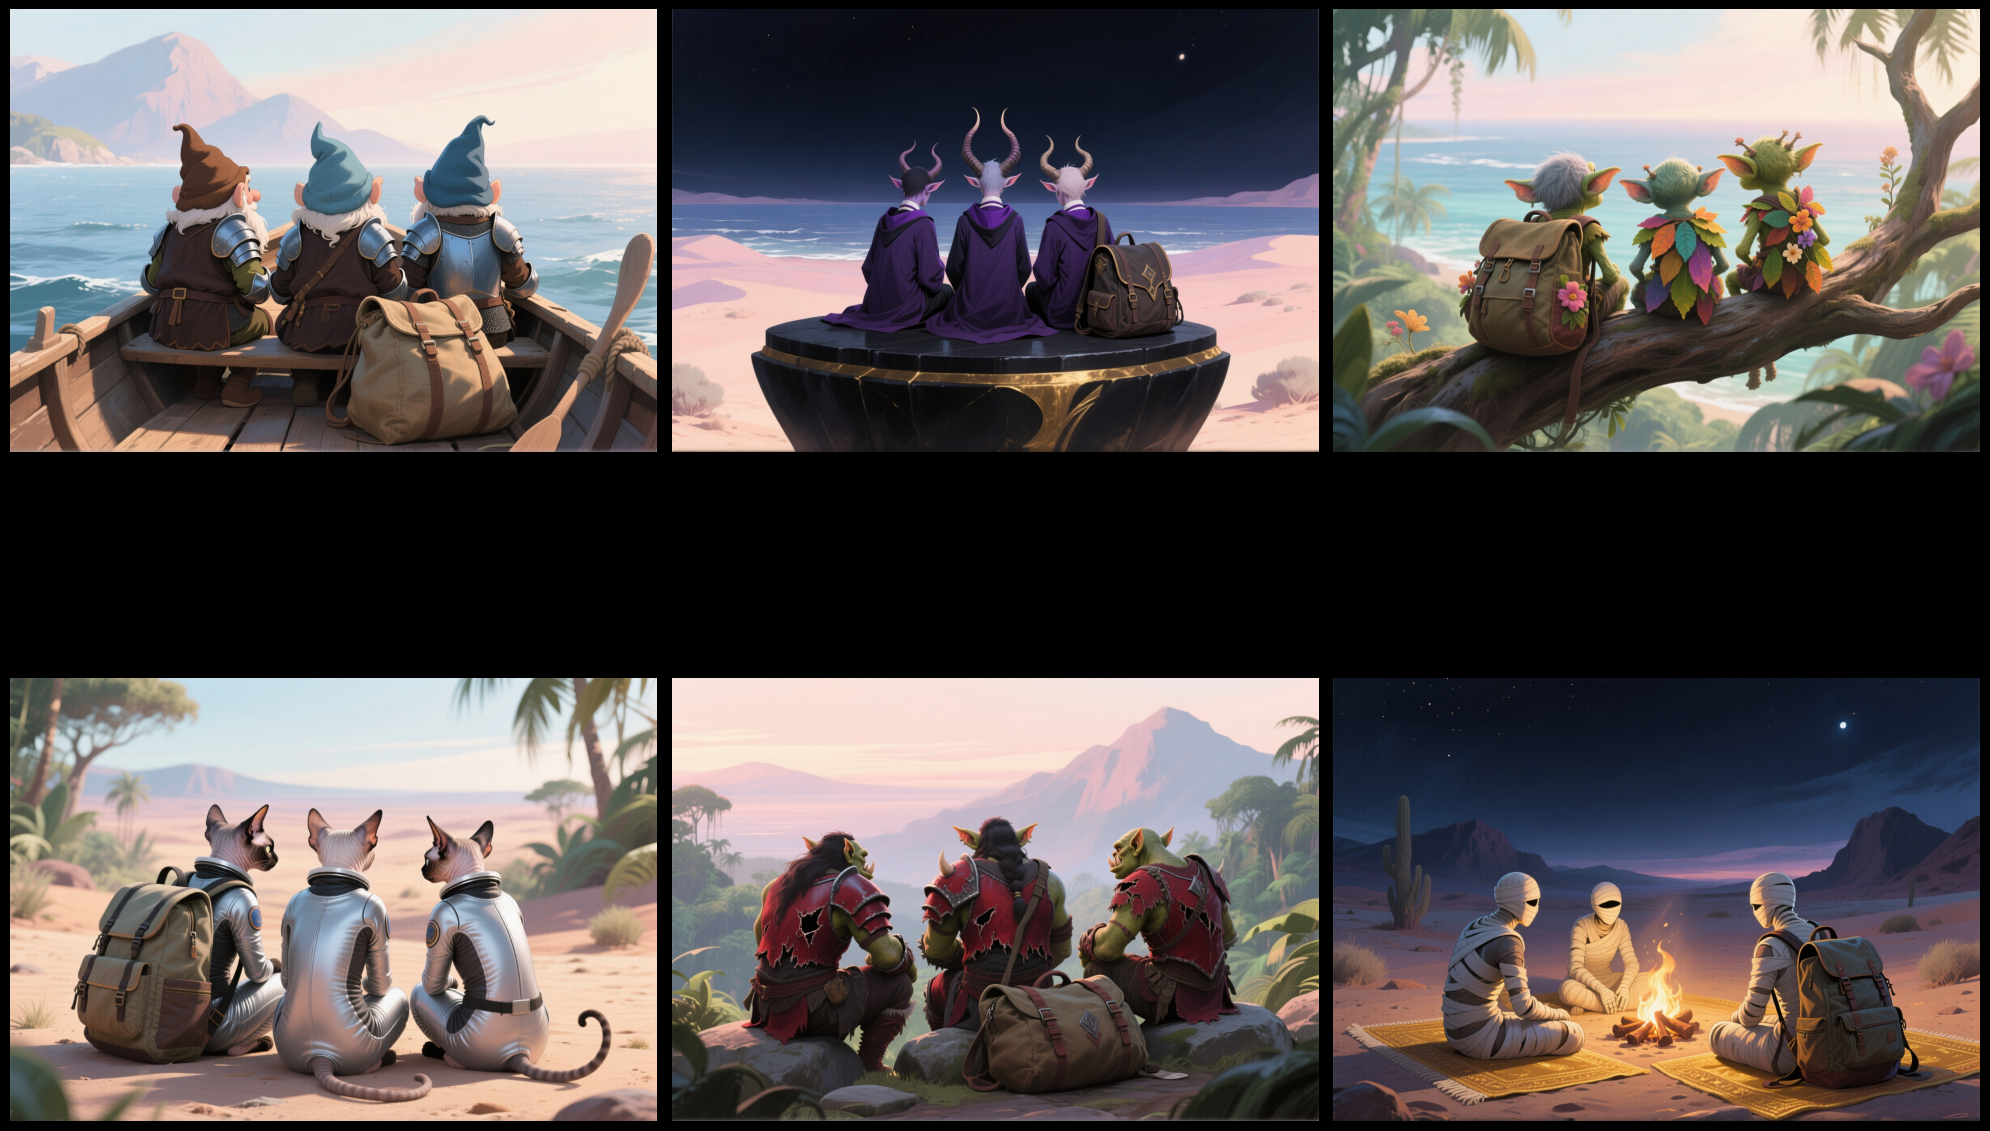

In [4]:
factions_dict = {
    "dwarves": {
        "description": "dwarves in dark-brown and light-blue armors",
        "on_desc": "in a wood boat",
        "art_style": "\nbackground: ocean and mountains\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality",
        "neg_prompt": ""
    },
    "demons": {
        "description": "tieflings with horns wearing dark-purple mage's robes",
        "on_desc": "on a big black and gold stele in a very dark night",
        "art_style": "\nbackground: ocean and desert\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality",
        "neg_prompt": ""
    },
    "twigs": {
        "description": "treants with colorful leaves and flowers",
        "on_desc": "on giant branch",
        "art_style": "\nbackground: jungle and ocean\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality",
        "neg_prompt": ""
    },
    "miaous": {
        "description": "tabaxi Ragdoll cats wearing skintight spacesuits",
        "on_desc": "on the ground",
        "art_style": "\nbackground: jungle and desert\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality",
        "neg_prompt": ""
    },
    "orcs": {
        "description": "orcs with dark-red torn armors",
        "on_desc": "on stones",
        "art_style": "\nbackground: mountains and jungle\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality",
        "neg_prompt": ""
    },
    "mummies": {
        "description": "mummies",
        "on_desc": "on golden carpets around a campfire in a very dark night",
        "art_style": "\nbackground: desert and mountains\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality",
        "neg_prompt": ""
    }
}

prompts = []
for faction in factions_dict:
    main_prompt = f"A group of 3 {factions_dict[faction]['description']} are sitting {factions_dict[faction]['on_desc']} with a big bagpack next to them with their backs to the viewer, watching the horizon"
    prompts.append((main_prompt + factions_dict[faction]['art_style'], factions_dict[faction]['neg_prompt']))

images_list = art.run_prompts(prompts, size=(1600, 1100), im_number=1, shift=3.10, steps=30, cfg=5)

# save images
# for i, img in enumerate(images_list):
#     output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards_ex", f"illu_art_test_{i:03d}.png")
#     img.save(output_filename)

fig, axes = plt.subplots(2, 3, figsize=(20, 16), facecolor='black')
axes = axes.flatten()

for idx, img in enumerate(images_list):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')

plt.tight_layout()
plt.show()

## 3. icons style and parameters

### does the illustration art style affects the icon creation ?

In [ ]:
main_prompt = "Dark blue droplet icon facing down with a shiny majestic purple to black spiral inside"
art_styles = [
    "\nWhite background\ncozy cottagecore illustration style, soft pastel colors, whimsical, gentle lighting, detailed foliage, storybook illustration, digital painting, high quality",
    "\nhite background\nin a chibi/kawaii anime style, large expressive eyes, bright vibrant colors, simple shading, cute pose, digital illustration, high quality, clean lines",
    "\nWhite background\nin a soft fantasy style, ethereal lighting, pastel colors, dreamlike atmosphere, delicate details, flowing fabrics, digital painting, high quality, magical",
    "\nWhite background\nin an isometric view, stylized flat colors, clean lines, vibrant palette, whimsical details, digital illustration, high quality, game art",
    "\nWhite background\nin a papercut illustration style, layered paper art, vibrant colors, intricate details, flat design, whimsical, digital illustration, high quality"
]
neg_prompt = "card contours, cards edges, dark background, shadows, extra elements"
prompts = []
for p in art_styles:
    prompts.append((main_prompt + p, neg_prompt))

images_list = art.run_prompts(prompts, size=(208, 208), im_number=4, shift=3.10, steps=30, cfg=5)
print(f"Generated {len(images_list)} images")


In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 16), facecolor='black')
axes = axes.flatten()

for idx, img in enumerate(images_list):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')

plt.tight_layout()
plt.show()

### the one taht fits the most the DA i want to give is the 2nd art style but whithout the eyes

In [ ]:
main_prompt = "Dark blue droplet icon facing down with a shiny majestic dark purple spiral inside"
art_style = "\nWhite background\nin a chibi/kawaii anime style, bright vibrant colors, simple shading, cute pose, digital illustration, high quality, clean lines"
neg_prompt = "card contours, cards edges, dark background, shadows, extra elements"

prompt = [(main_prompt + art_style, neg_prompt)]

images_list = art.run_prompts(prompt, size=(208, 208), im_number=5, shift=3.10, steps=30, cfg=5)
fig, axes = plt.subplots(2, 5, figsize=(20, 14), facecolor='black')
axes = axes.flatten()

for idx, img in enumerate(images_list):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')

plt.tight_layout()
plt.show()

### Tests on model param

In [ ]:

main_prompt = "Dark blue droplet icon facing down with a shiny majestic dark purple spiral inside"
art_style = "\nWhite background\nin a chibi/kawaii anime style, bright vibrant colors, simple shading, cute pose, digital illustration, high quality, clean lines"
neg_prompt = "card contours, cards edges, dark background, shadows, extra elements"
prompt = [(main_prompt + art_style, neg_prompt)]

shifts = [1, 2, 5, 10]
steps = [5, 10, 50]
cfgs = [1, 3, 5, 10, 20]

fig, axes = plt.subplots(len(shifts), len(steps) * len(cfgs), figsize=(24, 18), facecolor='black')
axes = axes.flatten()
img_idx = 0

for i, shift in enumerate(shifts):
    for j, step in enumerate(steps):
        for k, cfg in enumerate(cfgs):
            images_list = art.run_prompts(prompt, size=(208, 208), im_number=1, shift=shift, steps=step, cfg=cfg)
            ax = axes[img_idx]
            ax.imshow(images_list[0])
            ax.axis('off')
            ax.set_facecolor('black')
            ax.set_title(f'shift={shift}\nsteps={step}\ncfg={cfg}', fontsize=9)
            ax.title.set_color('white')
            img_idx += 1

plt.tight_layout()
plt.show()

shift 2 / step 5 / cfg 3 seems promising

In [ ]:
main_prompt = "Dark blue droplet icon facing down with a shiny majestic dark purple spiral inside"
art_style = "\nWhite background\nin a chibi/kawaii anime style, bright vibrant colors, simple shading, cute pose, digital illustration, high quality, clean lines"
neg_prompt = "card contours, cards edges, dark background, shadows, extra elements"

prompt = [(main_prompt + art_style, neg_prompt)]

images_list = art.run_prompts(prompt, size=(208, 208), im_number=10, shift=2, steps=5, cfg=3)
fig, axes = plt.subplots(2, 5, figsize=(20, 14), facecolor='black')
axes = axes.flatten()

for idx, img in enumerate(images_list):
    axes[idx].imshow(img)
    axes[idx].axis('off')
    axes[idx].set_facecolor('black')

plt.tight_layout()
plt.show()

finally the result seems a bit strange with these parameters

## 4. art style & param for Faction logos

In [ ]:
main_prompt = "An ancient logo of a blue and brown pickaxe"
art_style = "\nWhite background\n4K, Flat, digital painting, high quality"
neg_prompt = "dark background, shadows, text, writing"
prompt = [(main_prompt + art_style, neg_prompt)]

shifts = [3, 4]
steps = [20]
cfgs = [1, 3, 5]
size_scale = [1, 2, 3]

fig, axes = plt.subplots(len(shifts), len(steps) * len(cfgs) * len(size_scale), figsize=(24, 18), facecolor='black')
axes = axes.flatten()
img_idx = 0

for i, shift in enumerate(shifts):
    for j, step in enumerate(steps):
        for k, cfg in enumerate(cfgs):
            for s in size_scale:
                images_list = art.run_prompts(prompt, size=(208 * s, 208 * s), im_number=1, shift=shift, steps=step, cfg=cfg)
                ax = axes[img_idx]
                ax.imshow(images_list[0])
                ax.axis('off')
                ax.set_facecolor('black')
                ax.set_title(f'shift={shift}, steps={step}\ncfg={cfg}, size={s}', fontsize=10)
                ax.title.set_color('white')
                img_idx += 1

plt.tight_layout()
plt.show()


In [ ]:
main_prompt = "An logo of a beard with a blue and brown pickaxe"
art_style = "\nWhite background\n4K, Flat, digital painting, high quality"
neg_prompt = "dark background, shadows, text, writing"
prompt = [(main_prompt + art_style, neg_prompt)]

shifts = [3]
steps = [20]
cfgs = [5]
size_scale = [3]
im_number = 6

fig, axes = plt.subplots(len(shifts), len(steps) * len(cfgs) * len(size_scale) * im_number, figsize=(24, 18), facecolor='black')
axes = axes.flatten()
img_idx = 0

for i, shift in enumerate(shifts):
    for j, step in enumerate(steps):
        for k, cfg in enumerate(cfgs):
            for s in size_scale:
                images_list = art.run_prompts(prompt, size=(208 * s, 208 * s), im_number=im_number, shift=shift, steps=step, cfg=cfg)
                for img in images_list:
                    ax = axes[img_idx]
                    ax.imshow(img)
                    ax.axis('off')
                    ax.set_facecolor('black')
                    ax.set_title(f'shift={shift}, steps={step}\ncfg={cfg}, size={s}', fontsize=10)
                    ax.title.set_color('white')
                    img_idx += 1

plt.tight_layout()
plt.show()

## 5. demies cartes environnement (day/night, T°C, cata)

### 5.1 create front and back of cards

In [ ]:
prompt_dict = {
    "envcard_day_night": {
        "front": (   # day
            'A beautiful moon in a very dark sky with hundred of shiny stars, a few light clouds passes through\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality',
            'day, sun' # negative prompt
        ),
        "back": (    # night
            'a beautiful sun, with sun rays passing through small white clouds\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality',
            ''  # negative prompt
        )
    },
    "envcard_temperature": {
        "fc": (   # cold
            'A beautiful centered thermometer with intricate patterns, icy blue and white colors sparkling with frost on the left side, and a fiery red and orange glow on the right side, with swirling flames and molten lava patterns. The two contrasting halves meet seamlessly in the middle, creating a striking visual of fire and ice\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality',
            'numbers, writings' # negative prompt
        ),
    },
}

images = []
for key in prompt_dict:
    for side in prompt_dict[key]:
        prompt = prompt_dict[key][side]
        image = art.run_prompts([prompt], size=(int(target_card_size[0]/2), int(target_card_size[1]/2)), im_number=1, shift=3.10, steps=30, cfg=5)
        
        output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards_assets", f"{key}_{side}.png")
        image[0].save(output_filename)
        images.append(image[0])

#region plot
# fig, axs = plt.subplots(1, len(images), figsize=(8 * len(images), 10))
# if len(images) == 1:
#     axs = [axs]
# for ax, img in zip(axs, images):
#     ax.imshow(img)
#     ax.set_axis_off()
# plt.tight_layout()
# plt.show()
#endregion

### 5.2 create cataclyms cards fronts and back (unique back)

In [ ]:
# Front
biome_images = {
    "OC": (r'..\cards_assets\biome_OC_earth.png', r'..\cards_assets\cata_tsunami.png'),       # Ocean
    "MO": (r'..\cards_assets\biome_MO_earth.png', r'..\cards_assets\cata_avalanche.png'),     # Mountain
    "DE": (r'..\cards_assets\biome_DE_earth.png', r'..\cards_assets\cata_tornado.png'),       # Desert
    "JU": (r'..\cards_assets\biome_JU_earth.png', r'..\cards_assets\cata_monsoon.png')        # Jungle
}
for biome in biome_images:
    img_biome = Image.open(biome_images[biome][0]).convert('RGBA')
    img_cata = Image.open(biome_images[biome][1]).convert('RGBA')
    img_biome = img_biome.resize((int(target_card_size[0]/2), int(target_card_size[1]/2)))
    img_cata = img_cata.resize((int(target_card_size[0]/2), int(target_card_size[1]/2)))
    
    # Paste img_cata on top of img_biome using alpha channel
    im_fin = img_biome.copy()
    im_fin.paste(img_cata, (0, 0), img_cata)

    output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards_assets", f"envcard_cata_front_{biome}.png")
    im_fin.save(output_filename)
    
    im_fin.show()

In [ ]:
# Back
prompt_dict = {
    "envcard_cata": {
        "back": (
            'A single, continuous, and seamless panoramic scene depicting four intricately merged disasters without clear separations. A monstrous tsunami rages in the bottom-left corner, its tumultuous waters bleeding into an immense avalanche cascading down snow-capped peaks in the top-left. This frozen chaos then subtly transitions into a swirling desert tornado dominating the top-right, its sand blending with the snowy edges. Finally, the tornado\'s dusty winds dissipate into a torrential jungle heavy rain washing over the bottom-right, where dense foliage is drenched and rivers overflow, all elements flowing and connecting as one catastrophic, yet artistic, composition.\ncozy soft pastel colors, gentle lighting, digital painting, delicate details, realistic, high quality',
            ''  # negative prompt
        )
    }
}

images = []
for key in prompt_dict:
    for side in prompt_dict[key]:
        prompt = prompt_dict[key][side]
        image = art.run_prompts([prompt], size=(int(target_card_size[0]/2), int(target_card_size[1]/2)), im_number=1, shift=3.10, steps=30, cfg=5)
        
        output_filename = os.path.join(HOME_DIR, "lib", "artdesign", "cards_assets", f"{key}_{side}.png")
        image[0].save(output_filename)
        images.append(image[0])

#region plot
fig, axs = plt.subplots(1, len(images), figsize=(8 * len(images), 10))
if len(images) == 1:
    axs = [axs]
for ax, img in zip(axs, images):
    ax.imshow(img)
    ax.set_axis_off()
plt.tight_layout()
plt.show()
#endregion

### 5.3 build a PDF to print environnement cards and tokens

In [2]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import A4
from reportlab.lib.utils import ImageReader
import io
import webbrowser
from reportlab.lib.utils import ImageReader

Ajuster à la zone imprimable / Imprimé recto verso / retourner sur les bords longs

In [8]:
# Get the image folder
cards_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'cards_assets'))
# PDF settings
page_width, page_height = A4  # in points (1 pt = 1/72 inch)
# small card size in mm
card_width_mm = int(63/1.5)
card_height_mm = int(88/1.5)
token_card_size = (20, 20)  # in mm
tokken_border_thickness_mm = 1
# Convert mm to points: 1 mm = 2.83465 pt
mm_to_pt = 2.83465
card_width_pt = card_width_mm * mm_to_pt
card_height_pt = card_height_mm * mm_to_pt
token_card_size_pt = (token_card_size[0] * mm_to_pt, token_card_size[1] * mm_to_pt)
# Spacing between cards (1mm)
spacing_mm = 1
spacing_pt = spacing_mm * mm_to_pt

# Compute how many cards fit per row/column, accounting for spacing between cards
cols = int((page_width + spacing_pt) // (card_width_pt + spacing_pt))
rows = int((page_height + spacing_pt) // (card_height_pt + spacing_pt))

# Compute total grid size
grid_width = cols * card_width_pt + (cols - 1) * spacing_pt
grid_height = rows * card_height_pt + (rows - 1) * spacing_pt

# Center the grid on the page
margin_x = card_width_pt + spacing_pt
margin_y = card_height_pt + spacing_pt
token_margin_x = token_card_size_pt[0] + spacing_pt
token_margin_y = token_card_size_pt[1] + spacing_pt

# Prepare PDF
pdf_buffer = io.BytesIO()
c = canvas.Canvas(pdf_buffer, pagesize=A4)

# region FRONT PAGE --------------------------------------------------
# c.showPage() # front of the cards page

# day
n_im = 1
x = margin_x * (n_im-1) + spacing_pt
y = spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_day_night_front.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# cata tsunami
n_im = 2
x = margin_x * (n_im-1) + spacing_pt
y = spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_cata_front_OC.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# cata avalanche
n_im = 3
x = margin_x * (n_im-1) + spacing_pt
y = spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_cata_front_MO.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# cata tornado
n_im = 4
x = margin_x * (n_im-1) + spacing_pt
y = spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_cata_front_DE.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# cata monsoon
n_im = 1
y_row = 2
x = margin_x * (n_im-1) + spacing_pt
y = margin_y * (y_row-1) + spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_cata_front_JU.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# thermometer
n_im = 2
y_row = 2
x = margin_x * (n_im-1) + spacing_pt
y = margin_y * (y_row-1) + spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_temperature_fc.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# engineers boosts
for n_im in [1, 2, 3, 4]:
    y_row = 3
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * (y_row-1) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_boost.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engeneers mines
for n_im in [5, 6, 7, 8]:
    y_row = 3
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * (y_row-1) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_mine.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engineers slowing trap
for n_im in [1, 2, 3, 4]:
    y_row = 4
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_slowingtrap.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engineers trampoline
for n_im in [5, 6, 7, 8]:
    y_row = 4
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_trampoline.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# faction Dwarves token
for n_im in [1, 2]:
    y_row = 5
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_dwarves.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Demons token
for n_im in [3, 4]:
    y_row = 5
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_demons.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Twigs token
for n_im in [5, 6]:
    y_row = 5
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_twigs.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Miaous token
for n_im in [7, 8]:
    y_row = 5
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_miaous.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Orcs token
for n_im in [1, 2]:
    y_row = 6
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_orcs.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Mummies token
for n_im in [3, 4]:
    y_row = 6
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_mummies.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# pet trap
for n_im in [1, 2, 3, 4, 5, 6, 7, 8]:
    y_row = 7
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"effect_pettrap.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

#endregion FRONT PAGE --------------------------------------------------


# region BACK PAGE --------------------------------------------------
c.showPage() # back of the cards page
back_page_shift_printer_fix = 1 # to adjust for printer margin issues - print 1 mm lower

# night
n_im = 1
x = page_width - (margin_x * n_im) - spacing_pt
y = spacing_pt - back_page_shift_printer_fix # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_day_night_back.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# cata back
for n_im in [2, 3, 4]:
    x = page_width - (margin_x * n_im) - spacing_pt
    y = spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"envcard_cata_back.png")
    c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# last cata back
n_im = 1
y_row = 2
x = page_width - (margin_x * n_im) - spacing_pt
y = margin_y * (y_row-1) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_cata_back.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# thermometer
n_im = 2
y_row = 2
x = page_width - (margin_x * n_im) - spacing_pt
y = margin_y * (y_row-1) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_temperature_fc.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# engineers
for n_im in [1, 2, 3, 4]:
    y_row = 3
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * (y_row-1) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_boost.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engineers mines
for n_im in [5, 6, 7, 8]:
    y_row = 3
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * (y_row-1) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_mine.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engineers slowing trap
for n_im in [1, 2, 3, 4]:
    y_row = 4
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_slowingtrap.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engineers trampoline
for n_im in [5, 6, 7, 8]:
    y_row = 4
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_trampoline.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# faction Dwarves token
for n_im in [1, 2]:
    y_row = 5
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_dwarves.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Demons token
for n_im in [3, 4]:
    y_row = 5
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_demons.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Twigs token
for n_im in [5, 6]:
    y_row = 5
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_twigs.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Miaous token
for n_im in [7, 8]:
    y_row = 5
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_miaous.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Orcs token
for n_im in [1, 2]:
    y_row = 6
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_orcs.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Mummies token
for n_im in [3, 4]:
    y_row = 6
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_mummies.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# pet trap
for n_im in [1, 2, 3, 4, 5, 6, 7, 8]:
    y_row = 7
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * 2 + token_margin_y * (y_row-3) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"effect_pettrap.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

#endregion BACK PAGE --------------------------------------------------

c.save()
pdf_buffer.seek(0)
with open("environment_cards_tokens.pdf", "wb") as f:
    f.write(pdf_buffer.read())
webbrowser.open("environment_cards_tokens.pdf")

True

copy to save it

In [ ]:
# Get the image folder
cards_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'cards_assets'))
# PDF settings
page_width, page_height = A4  # in points (1 pt = 1/72 inch)
# small card size in mm
card_width_mm = int(63/1.5)
card_height_mm = int(88/1.5)
token_card_size = (20, 20)  # in mm
tokken_border_thickness_mm = 1
# Convert mm to points: 1 mm = 2.83465 pt
mm_to_pt = 2.83465
card_width_pt = card_width_mm * mm_to_pt
card_height_pt = card_height_mm * mm_to_pt
token_card_size_pt = (token_card_size[0] * mm_to_pt, token_card_size[1] * mm_to_pt)
# Spacing between cards (1mm)
spacing_mm = 1
spacing_pt = spacing_mm * mm_to_pt

# Compute how many cards fit per row/column, accounting for spacing between cards
cols = int((page_width + spacing_pt) // (card_width_pt + spacing_pt))
rows = int((page_height + spacing_pt) // (card_height_pt + spacing_pt))

# Compute total grid size
grid_width = cols * card_width_pt + (cols - 1) * spacing_pt
grid_height = rows * card_height_pt + (rows - 1) * spacing_pt

# Center the grid on the page
margin_x = card_width_pt + spacing_pt
margin_y = card_height_pt + spacing_pt
token_margin_x = token_card_size_pt[0] + spacing_pt
token_margin_y = token_card_size_pt[1] + spacing_pt

# Prepare PDF
pdf_buffer = io.BytesIO()
c = canvas.Canvas(pdf_buffer, pagesize=A4)

# region FRONT PAGE --------------------------------------------------
# c.showPage() # front of the cards page

# day
n_im = 1
x = margin_x * (n_im-1) + spacing_pt
y = spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_day_night_front.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# cata tsunami
n_im = 2
x = margin_x * (n_im-1) + spacing_pt
y = spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_cata_front_OC.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# cata avalanche
n_im = 3
x = margin_x * (n_im-1) + spacing_pt
y = spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_cata_front_MO.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# cata tornado
n_im = 4
x = margin_x * (n_im-1) + spacing_pt
y = spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_cata_front_DE.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# cata monsoon
n_im = 5
x = margin_x * (n_im-1) + spacing_pt
y = spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_cata_front_JU.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# thermometer
n_im = 6
x = margin_x * (n_im-1) + spacing_pt
y = spacing_pt # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_temperature_fc.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# engineers boosts
for n_im in [1, 2, 3, 4]:
    y_row = 2
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * (y_row-1) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_boost.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engeneers mines
for n_im in [5, 6, 7, 8]:
    y_row = 2
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y * (y_row-1) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_mine.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engineers slowing trap
for n_im in [1, 2, 3, 4]:
    y_row = 3
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y + token_margin_y * (y_row-2) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_slowingtrap.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engineers trampoline
for n_im in [5, 6, 7, 8]:
    y_row = 3
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y + token_margin_y * (y_row-2) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_trampoline.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# faction Dwarves
for n_im in [1, 2]:
    y_row = 4
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y + token_margin_y * (y_row-2) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_dwarves.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Dwarves
for n_im in [3, 4]:
    y_row = 4
    x = token_margin_x * (n_im-1) + spacing_pt
    y = margin_y + token_margin_y * (y_row-2) + spacing_pt # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_reptilians.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

#endregion FRONT PAGE --------------------------------------------------

# region BACK PAGE --------------------------------------------------
c.showPage() # back of the cards page
back_page_shift_printer_fix = 1 # to adjust for printer margin issues - print 1 mm lower

# night
n_im = 1
x = page_width - (margin_x * n_im) - spacing_pt
y = spacing_pt - back_page_shift_printer_fix # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_day_night_back.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# cata back
for n_im in [2, 3, 4, 5]:
    x = page_width - (margin_x * n_im) - spacing_pt
    y = spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"envcard_cata_back.png")
    c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# thermometer
n_im = 6
x = page_width - (margin_x * n_im) - spacing_pt
y = spacing_pt - back_page_shift_printer_fix # margin_y * n_im
img_path = os.path.join(cards_dir, f"envcard_temperature_fc.png")
c.drawImage(ImageReader(img_path), x, y, width=card_width_pt, height=card_height_pt, preserveAspectRatio=False, mask='auto')

# engineers
for n_im in [1, 2, 3, 4]:
    y_row = 2
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * (y_row-1) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_boost.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engineers mines
for n_im in [5, 6, 7, 8]:
    y_row = 2
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y * (y_row-1) + spacing_pt  - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_mine.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engineers slowing trap
for n_im in [1, 2, 3, 4]:
    y_row = 3
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y + token_margin_y * (y_row-2) + spacing_pt - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_slowingtrap.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# engineers trampoline
for n_im in [5, 6, 7, 8]:
    y_row = 3
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y + token_margin_y * (y_row-2) + spacing_pt  - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"supfac_eng_trampoline.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); c.rect(x, y, token_card_size_pt[0], token_card_size_pt[1], stroke=1, fill=0)

# faction Dwarves
for n_im in [1, 2]:
    y_row = 4
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y + token_margin_y * (y_row-2) + spacing_pt  - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_dwarves.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

# faction Dwarves
for n_im in [3, 4]:
    y_row = 4
    x = page_width - (token_margin_x * n_im) - spacing_pt
    y = margin_y + token_margin_y * (y_row-2) + spacing_pt  - back_page_shift_printer_fix # margin_y * n_im
    img_path = os.path.join(cards_dir, f"logo_reptilians.png")
    c.drawImage(ImageReader(img_path), x, y, width=token_card_size_pt[0], height=token_card_size_pt[1], preserveAspectRatio=False, mask='auto')
    c.setStrokeColorRGB(0, 0, 0); c.setLineWidth(tokken_border_thickness_mm); center_x = x + token_card_size_pt[0] / 2; center_y = y + token_card_size_pt[1] / 2
    radius = min(token_card_size_pt) / 2
    c.circle(center_x, center_y, radius, stroke=1, fill=0)

#endregion BACK PAGE --------------------------------------------------

c.save()
pdf_buffer.seek(0)
with open("environment_cards_tokens.pdf", "wb") as f:
    f.write(pdf_buffer.read())
webbrowser.open("environment_cards_tokens.pdf")